<a href="https://colab.research.google.com/github/DenShum/Statistics-in-Python/blob/main/%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B74.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/water.csv')
print(df.shape)
df.info() # смотрим информацию по датафрему (null, type, столбцов, строк)

(61, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [ ]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df.describe() # статистические показатели столбцов c числовыми типами данных 

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [ ]:
df.location.value_counts() # количество уникальных значений в столбце location

North    35
South    26
Name: location, dtype: int64

In [ ]:
print(df.hardness.value_counts())
print(len(df.hardness.value_counts())) # количество уникальных значений в столбце hardness

14     4
8      3
13     3
71     3
21     2
39     2
44     2
10     2
15     2
78     2
20     2
6      2
122    2
5      2
16     1
18     1
17     1
84     1
133    1
12     1
81     1
73     1
138    1
75     1
26     1
9      1
59     1
57     1
27     1
90     1
50     1
49     1
101    1
91     1
107    1
105    1
37     1
53     1
96     1
94     1
60     1
68     1
Name: hardness, dtype: int64
42


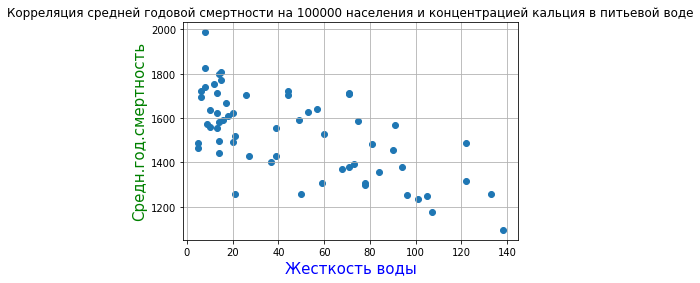

In [ ]:
plt.scatter(df['hardness'],df['mortality'])
plt.title ('Корреляция средней годовой смертности на 100000 населения и концентрацией кальция в питьевой воде')
plt.ylabel("Средн.год.смертность", fontsize=15,color="Green")
plt.xlabel("Жесткость воды", fontsize=15,color="Blue")
plt.grid()
# график обратной линейной зависимости

In [ ]:
# Коэффициент корреляции Пирсона - средняя обратная взаимосвязь
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
X = df[['hardness']] # то, на основании чего прогнозируем
y = df[['mortality']] # то, что прогнозируем
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #разбивка данных на тренировочную и тестовую выборки

y_train.shape

(42, 1)

In [ ]:
X_train.shape

(42, 1)

In [ ]:
model = LinearRegression() # инициализируем линейную регрессию
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_ # коэффициент линейной регрессии (увеличение y_pred при увеличении X на 1)

array([[-3.13167087]])

In [ ]:
model.intercept_ # коэффициент intercept (y_pred при X = 0)

array([1668.97229773])

In [ ]:
y_pred = model.predict(X_test) # прогноз(предсказанные значения)
y_pred

array([[1340.14685615],
       [1637.65558901],
       [1625.12890552],
       [1531.17877935],
       [1424.7019697 ],
       [1606.33888028],
       [1252.46007173],
       [1434.09698232],
       [1603.20720941],
       [1650.18227249],
       [1484.20371627],
       [1415.30695708],
       [1546.83713371],
       [1625.12890552],
       [1446.62366581],
       [1546.83713371],
       [1637.65558901],
       [1621.99723465],
       [1352.67353964]])

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации
# коэффициент слабый, но приемлемый для прогноза

0.5046490611017092

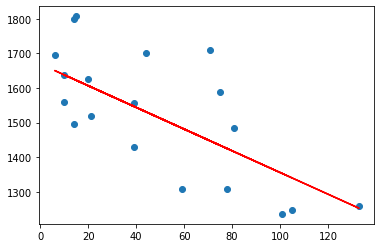

In [ ]:
plt.scatter(X_test, y_test) # визуализация модели с линией регрессии
plt.plot(X_test, y_pred, c='r')

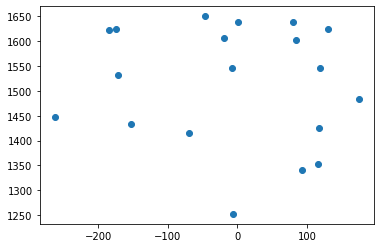

In [ ]:
res = plt.scatter(y_pred-y_test, y_pred) # график остатков
res


**Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df_North = df[df.location == 'North'] #фильтруем датафрейм location
df_South = df[df.location == 'South']
print(df_North.shape)
print(df_South.shape)

(35, 5)
(26, 5)


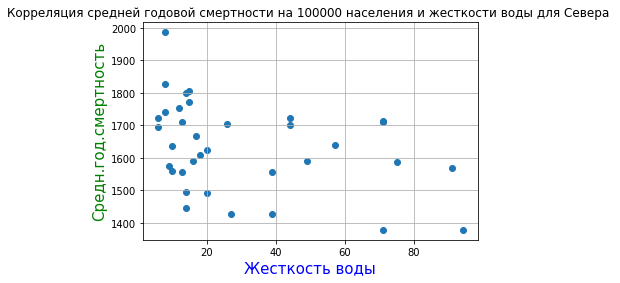

In [ ]:
plt.scatter(df_North['hardness'],df_North['mortality'])
plt.title ('Корреляция средней годовой смертности на 100000 населения и жесткости воды для Севера ')
plt.ylabel("Средн.год.смертность", fontsize=15,color="Green")
plt.xlabel("Жесткость воды", fontsize=15,color="Blue")
plt.grid()
# линейная обратная зависимость прослеживается не четко (м.б. не линейная ?)

In [ ]:
# Коэффициент корреляции Пирсона для Севера
df_North[['hardness', 'mortality']].corr()
# в пределах средней корреляции, но ниже, чем в целом по df

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
# Коэффициент корреляции Спирмена для Севера
df_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
X = df_North[['hardness']] # то, на основании чего прогнозируем
y = df_North[['mortality']] # то, что прогнозируем
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42) #разбивка данных на тренировочную и тестовую выборки
print(X_train2.shape)
print(y_train2.shape)

(24, 1)
(24, 1)


In [ ]:
model2 = LinearRegression() # инициализируем линейную регрессию для Севера
model2.fit(X_train2, y_train2)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model2.coef_ # коэффициент линейной регрессии для Севера

array([[-1.97686226]])

In [ ]:
model2.intercept_ # коэффициент intercept для Севера

array([1688.15022903])

In [ ]:
y_pred2 = model2.predict(X_test2) # прогноз(предсказанные значения)
y_pred2

array([[1672.33533095],
       [1670.35846869],
       [1660.47415739],
       [1676.28905547],
       [1656.52043287],
       [1547.79300857],
       [1601.16828959],
       [1672.33533095],
       [1611.05260089],
       [1658.49729513],
       [1611.05260089]])

In [ ]:
model2.score(X_test2, y_test2) # метод возвращает значение коэффициента детерминации для Севера
# связь между переменными модели отсутствует 

0.018885304285745863

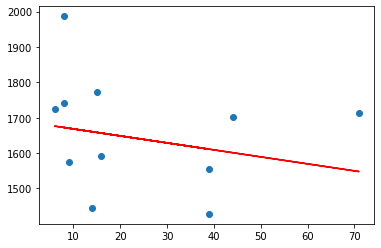

In [ ]:
plt.scatter(X_test2, y_test2) # визуализация модели с линией регрессии для Севера
plt.plot(X_test2, y_pred2, c='r')

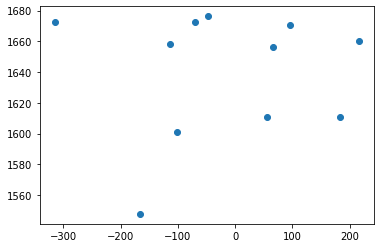

In [ ]:
res2 = plt.scatter(y_pred2-y_test2, y_pred2) # график остатков для Севера
res2
# остатки расположены не симметрично: мало наблюдений или не линейная взаимосвязь

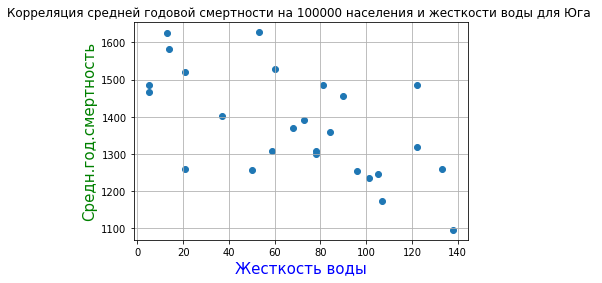

In [ ]:
plt.scatter(df_South['hardness'],df_South['mortality'])
plt.title ('Корреляция средней годовой смертности на 100000 населения и жесткости воды для Юга ')
plt.ylabel("Средн.год.смертность", fontsize=15,color="Green")
plt.xlabel("Жесткость воды", fontsize=15,color="Blue")
plt.grid()

In [ ]:
# Коэффициент корреляции Пирсона для Юга - средняя обратная взаимосвязь
df_South[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# Коэффициент корреляции Спирмена для Юга
df_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
X = df_South[['hardness']] # то, на основании чего прогнозируем
y = df_South[['mortality']] # то, что прогнозируем
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, random_state=42) #разбивка данных на тренировочную и тестовую выборки
print(X_train3.shape)
print(y_train3.shape)

(18, 1)
(18, 1)


In [ ]:
model3 = LinearRegression() # инициализируем линейную регрессию для Юга
model3.fit(X_train3, y_train3)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model3.coef_ # коэффициент линейной регрессии для Юга

array([[-3.51342921]])

In [ ]:
model3.intercept_ # коэффициент intercept для Юга

array([1640.22046034])

In [ ]:
y_pred3 = model3.predict(X_test3) # прогноз(предсказанные значения)
y_pred3

array([[1211.58209643],
       [1622.65331428],
       [1271.31039304],
       [1211.58209643],
       [1510.22357948],
       [1566.43844688],
       [1432.92813681],
       [1622.65331428]])

In [ ]:
model3.score(X_test3, y_test3) # метод возвращает значение коэффициента детерминации для га
#  прогноз строить на основании этих данных нельзя - мало наблюдений 

-2.5519223012352077

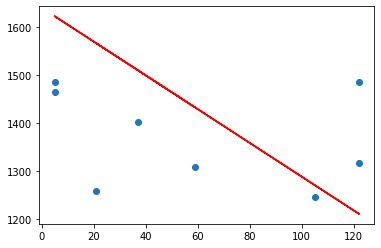

In [ ]:
plt.scatter(X_test3, y_test3) # визуализация модели с линией регрессии для Юга
plt.plot(X_test3, y_pred3, c='r')

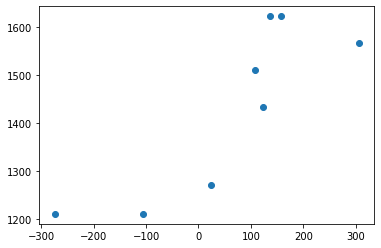

In [ ]:
res3 = plt.scatter(y_pred3-y_test3, y_pred3) # график остатков для Юга
res3